# 심화과제


Req-7. 명세서 9p의 내용을 따라 Face Detection을 하는 코드를 작성하고 실행해 보세요.

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/content


In [ ]:
!pip install face_recognition

     |████████████████████████████████| 100.1 MB 22 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=ee2c6c836f7ccf976dc5a162c91ae641eeaf93b251af7f2d5e1708da45bafec5
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [ ]:
import cv2, os
import face_recognition as fr
from IPython.display import Image, display
from matplotlib import pyplot as plt

image_path = "/gdrive/My Drive/twice.jpg"

image = fr.load_image_file(image_path)
face_locations = fr.face_locations(image)

for (top, right, bottom, left) in face_locations:
  cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 3)

  # 이미지 버퍼 출력
  plt.rcParams["figure.figsize"] = (16,16)
  plt.imshow(image)
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

Req-8. 명세서 12p를 참고하여 4명의 인물사진에서 얼굴을 감지하여 인코딩을 한 후 새로운 인물사진 unknown을 입력 받아 기존 4명의 얼굴 중 동일인을 찾는 코드를 구현 및 실행해 보세요.


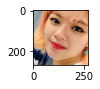

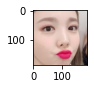

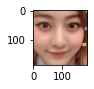

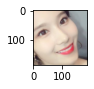

In [ ]:
import cv2, os
import face_recognition as fr
from IPython.display import Image, display
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (1, 1)

# 이미지 파일을 로드하여 know_person_list 리스트 생성
known_person_list = []
known_person_list.append(fr.load_image_file("/gdrive/My Drive/colab/person1.jfif"))
known_person_list.append(fr.load_image_file("/gdrive/My Drive/colab/person2.jfif"))
known_person_list.append(fr.load_image_file("/gdrive/My Drive/colab/person3.jfif"))
known_person_list.append(fr.load_image_file("/gdrive/My Drive/colab/person5.jfif"))

# 얼굴을 인식하여 감지된 부분을 잘라낸 다음 known_face_list에 저장
known_face_list = []
for person in known_person_list:
  # 얼굴좌표를 알아내서 잘라낸다
  top, right, bottom, left = fr.face_locations(person)[0]
  face_image = person[top:bottom, left:right]
  # known_face_list에 잘라낸 face_image를 저장
  known_face_list.append(face_image)

# known_face_list에 저장된 얼굴들 출력
for face in known_face_list:
  plt.imshow(face)
  plt.show()

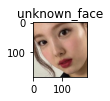

In [ ]:
# 기존 리스트에 없는 새로운 파일을 열어서
unknown_person = fr.load_image_file("/gdrive/My Drive/colab/person4.jfif")

# 얼굴좌표를 알아내서 잘라낸다
top, right, bottom, left = fr.face_locations(unknown_person)[0]
unknown_face = unknown_person[top:bottom, left:right]

# unknown_face 라는 타이틀을 붙여서 표시
plt.title("unknown_face")
plt.imshow(unknown_face)
plt.show()

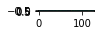

In [ ]:
# unknown_person_face를 인코딩
enc_unknown_face = fr.face_encodings(unknown_face)

# 화면에 표시
plt.imshow(enc_unknown_face)
plt.show()

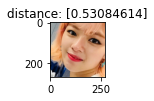

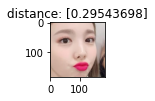

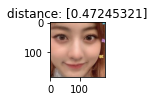

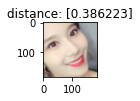

In [ ]:
# 등록된 얼굴리스트를 비교
for face in known_face_list:
  # 등록된 얼굴을 128-dimensional face 인코딩
  enc_known_face = fr.face_encodings(face)
  # 등록된 얼굴과 새로운 얼굴의 distance를 얻기
  distance = fr.face_distance(enc_known_face, enc_unknown_face[0])
  
  # distance 수치를  포함한 얼굴 출력
  plt.title("distance: "+str(distance))
  plt.imshow(face)
  plt.show()